In [ ]:
url = 'https://bschool.careers360.com/colleges/ranking?page=2'

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re

In [2]:
clg_names=[]
fee1 = []
rank1 = []
rating= []
review = []
ownership = []
for i in range(1,20):
    url = f'https://bschool.careers360.com/colleges/ranking?page={i}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    container = soup.find_all('div', class_ = 'tupple')
    for coll in container:
        clg= coll.find('h3', class_='college_name d-md-none')
    
        try :
            clg_names.append(clg.text)
        except IndexError:
            clg_names.append(np.nan)
        
        fee = coll.find('ul', class_ = 'snippet_list')
        if fee:
            fee1.append(fee.text)
        else:
            fee1.append(np.nan)
                        
        rank = coll.find('div', class_ = 'tupple_top_block_left')
        if rank:
            rank_value = rank.strong.text
            rank1.append(rank_value)
        else:
            rank1.append(np.nan)
            
        rating1 = coll.find('span', class_ = 'star_text')
        if rating1:
            rating2 = rating1.b.text
            rating.append(rating2.split('/')[0])
        else:
            rating.append(np.nan)
        
        reviews = coll.find('span', class_ = 'review_text')
        if reviews:
            review.append(reviews.text.split(' ')[0])
        else:
            review.append(np.nan)
            
        ownerships = coll.find('strong', class_ = 'strong_ownership')
        if ownerships:
            ownership.append(ownerships.text.split('/')[0])
        else:
            ownership.append(np.nan)

In [165]:
len(clg_names)

496

In [166]:
len(fee1)

496

In [175]:
len(rank1)

496

In [168]:
len(rating)

496

In [169]:
len(review)

496

In [170]:
len(review)

496

In [171]:
len(ownership)

496

In [4]:
 df = pd.DataFrame({ 'clg_names' : clg_names,
                    'fee': fee1,
                    'rank':rank1,
                    'rating': rating,
                     'review': review,
                    'ownership': ownership})

In [5]:
df

clg_names  \
0    IIM Ahmedabad - Indian Institute of Management...   
1    IIM Bangalore - Indian Institute of Management...   
2    IIM Kozhikode - Indian Institute of Management...   
3    IIM Calcutta - Indian Institute of Management ...   
4     IIT Delhi - Indian Institute of Technology Delhi   
..                                                 ...   
491                    Delhi School of Business, Delhi   
492  Lucknow University - University of Lucknow, Lu...   
493  GJIMT Mohali - Gian Jyoti Institute of Managem...   
494  BK School of Business Management, Gujarat Univ...   
495                           Amity University, Jaipur   

                                                   fee rank rating review  \
0    MBA (3 Courses) Fees :  ₹20 Lakhs  - ₹24.61 Lakhs    1    4.8     37   
1    MBA (4 Courses) Fees :  ₹20.11 Lakhs  - ₹24.50...    2    4.5     18   
2    P.G.P (5 Courses) Fees :  ₹13.12 Lakhs  - ₹22....    3    4.4     53   
3                                                  NaN    4    4.9     17   
4    MBA (2 Courses) Fees :  ₹11.20 Lakhs  - ₹12.10...    5    4.7    178   
..                                                 ...  ...    ...    ...   
491                                                NaN   --    NaN    NaN   
492  MBA (10 Courses) Fees :  ₹3.24 Lakhs  - ₹5.83 ...   --    4.3    386   
493                                  Ph.D (5 Courses)    --    4.2      8   
494                  P.G.D (14 Courses) Fees :  ₹15 K    --    3.9     27   
495  B.B.A (2 Courses) Fees :  ₹5.52 Lakhs  - ₹11.6...   --    4.1    195   

    ownership  
0      Public  
1      Public  
2      Public  
3      Public  
4      Public  
..        ...  
491   Private  
492    Public  
493   Private  
494    Public  
495   Private  

[496 rows x 6 columns]

In [316]:
df.isna().sum()

clg_names      0
fee          166
rank           0
rating        27
review        27
ownership      0
dtype: int64

In [317]:
df['city'] = df['clg_names'].astype(str).str.split().str[-1]
df['city']


0      Ahmedabad
1      Bangalore
2      Kozhikode
3       Calcutta
4          Delhi
         ...    
491       Indore
492     Varanasi
493        Hubli
494       Bhopal
495      Lucknow
Name: city, Length: 496, dtype: object

In [318]:
df['clgs'] = df['clg_names'].astype(str).str.split().str[0]
df['clgs']

0          IIM
1          IIM
2          IIM
3          IIM
4          IIT
        ...   
491       PIMR
492        SMS
493     Global
494     Jagran
495    Lucknow
Name: clgs, Length: 496, dtype: object

In [319]:
df['fee']

0                  MBA (2 Courses) Fees :  ₹24.61 Lakhs 
1      MBA (4 Courses) Fees :  ₹20.11 Lakhs  - ₹24.50...
2      P.G.P (5 Courses) Fees :  ₹13.12 Lakhs  - ₹22....
3                                                    NaN
4      MBA (2 Courses) Fees :  ₹11.20 Lakhs  - ₹12.10...
                             ...                        
491    MBA (7 Courses) Fees :  ₹1.26 Lakhs  - ₹2.36 L...
492                                                  NaN
493                                                  NaN
494    B.B.A (3 Courses) Fees :  ₹2.55 Lakhs  - ₹3.15...
495    MBA (10 Courses) Fees :  ₹3.24 Lakhs  - ₹5.83 ...
Name: fee, Length: 496, dtype: object

In [320]:
df['type_of_Course'] = df['fee'].astype(str).str.split('(').str[1]
df['type_of_Course']

0                     2 Courses) Fees :  ₹24.61 Lakhs 
1      4 Courses) Fees :  ₹20.11 Lakhs  - ₹24.50 Lakhs
2      5 Courses) Fees :  ₹13.12 Lakhs  - ₹22.50 Lakhs
3                                                  NaN
4      2 Courses) Fees :  ₹11.20 Lakhs  - ₹12.10 Lakhs
                            ...                       
491      7 Courses) Fees :  ₹1.26 Lakhs  - ₹2.36 Lakhs
492                                                NaN
493                                                NaN
494      3 Courses) Fees :  ₹2.55 Lakhs  - ₹3.15 Lakhs
495     10 Courses) Fees :  ₹3.24 Lakhs  - ₹5.83 Lakhs
Name: type_of_Course, Length: 496, dtype: object

In [321]:
df['type_of_Courses'] = df['type_of_Course'].astype(str).str.split().str[0]
df['type_of_Courses']

0        2
1        4
2        5
3      nan
4        2
      ... 
491      7
492    nan
493    nan
494      3
495     10
Name: type_of_Courses, Length: 496, dtype: object

In [322]:
df['Course'] = df['fee'].astype(str).str.split().str[0]
df['Course']

0        MBA
1        MBA
2      P.G.P
3        nan
4        MBA
       ...  
491      MBA
492      nan
493      nan
494    B.B.A
495      MBA
Name: Course, Length: 496, dtype: object

In [323]:
pattern = r'₹([\d.]+) Lakhs'
df['fees'] = df['fee'].astype(str).str.findall(pattern).apply(lambda x: [float(i) for i in x] if len(x) > 0 else np.nan)

In [324]:
df['fees'] = df['fees'].apply(lambda x: ' ,'.join(map(str, x)) if isinstance(x, list) else x)
df['fees']

0            24.61
1      20.11 ,24.5
2      13.12 ,22.5
3              NaN
4       11.2 ,12.1
          ...     
491     1.26 ,2.36
492            NaN
493            NaN
494     2.55 ,3.15
495     3.24 ,5.83
Name: fees, Length: 496, dtype: object

In [325]:
df['fees'] = df['fees'].astype(str).str.split().str[0]
df['fees']

0      24.61
1      20.11
2      13.12
3        nan
4       11.2
       ...  
491     1.26
492      nan
493      nan
494     2.55
495     3.24
Name: fees, Length: 496, dtype: object

In [326]:
df.drop(['clg_names','fee','type_of_Course'] , axis=1, inplace=True)

In [327]:
df

rank rating review ownership       city     clgs type_of_Courses Course  \
0      1    4.8     37    Public  Ahmedabad      IIM               2    MBA   
1      2    4.5     18    Public  Bangalore      IIM               4    MBA   
2      3    4.4     53    Public  Kozhikode      IIM               5  P.G.P   
3      4    4.9     17    Public   Calcutta      IIM             nan    nan   
4      5    4.7    174    Public      Delhi      IIT               2    MBA   
..   ...    ...    ...       ...        ...      ...             ...    ...   
491   --    4.2     67   Private     Indore     PIMR               7    MBA   
492   --    4.5     67   Private   Varanasi      SMS             nan    nan   
493   --    NaN    NaN   Private      Hubli   Global             nan    nan   
494   --    4.1      7   Private     Bhopal   Jagran               3  B.B.A   
495   --    4.3    379    Public    Lucknow  Lucknow              10    MBA   

      fees  
0    24.61  
1    20.11  
2    13.12  
3      nan  
4     11.2  
..     ...  
491   1.26  
492    nan  
493    nan  
494   2.55  
495   3.24  

[496 rows x 9 columns]

In [331]:
df.isna().sum()

rank                0
rating             27
review             27
ownership           0
city                0
clgs                0
type_of_Courses     0
Course              0
fees                0
dtype: int64

In [371]:
df['type_of_Courses'] = df['type_of_Courses'].replace('nan',0)
df['fees'] = df['fees'].replace('nan',0.00)

df['rating']= df['rating'].fillna(0)
df['review']= df['review'].fillna(0)

In [372]:
df

rank  rating  review ownership       city     clgs  type_of_Courses  \
0     1.0     4.8      37    Public  Ahmedabad      IIM                2   
1     2.0     4.5      18    Public  Bangalore      IIM                4   
2     3.0     4.4      53    Public  Kozhikode      IIM                5   
3     4.0     4.9      17    Public   Calcutta      IIM                0   
4     5.0     4.7     174    Public      Delhi      IIT                2   
..    ...     ...     ...       ...        ...      ...              ...   
491   0.0     4.2      67   Private     Indore     PIMR                7   
492   0.0     4.5      67   Private   Varanasi      SMS                0   
493   0.0     0.0       0   Private      Hubli   Global                0   
494   0.0     4.1       7   Private     Bhopal   Jagran                3   
495   0.0     4.3     379    Public    Lucknow  Lucknow               10   

    Course   fees  
0      MBA  24.61  
1      MBA  20.11  
2    P.G.P  13.12  
3      nan   0.00  
4      MBA  11.20  
..     ...    ...  
491    MBA   1.26  
492    nan   0.00  
493    nan   0.00  
494  B.B.A   2.55  
495    MBA   3.24  

[496 rows x 9 columns]

In [60]:
df.sample(10)

rank  rating  review ownership          city    clgs  type_of_Courses  \
378     0     4.2      78   Private        Nagpur   RCOEM                2   
270     0     4.6      11   Private     Bangalore    NSOM                1   
226     0     4.4      23   Private          Pune   FLAME                2   
238     0     5.0       3   Private      Lonavala  SIBACA                0   
51     53     4.5      39    Public          Gaya     IIM                0   
32     33     4.4      92   Private           Goa     GIM                5   
361     0     3.7      88   Private  Lakshmangarh    Mody                0   
192     0     4.0      10   Private          Pune  DYPIMR                2   
18     19     4.3     101    Public      Kashipur     IIM                2   
322     0     4.3       3   Private     Bishnupur     CBS                0   

      Course   fees  
378      MBA   2.21  
270  P.G.D.M   6.50  
226      MBA  14.10  
238     None   0.00  
51      None   0.00  
32   P.G.D.M   4.78  
361     None   0.00  
192      MBA   2.60  
18       MBA  16.96  
322     None   0.00

In [374]:
df['rank'] = pd.to_numeric(df['rank'], errors='coerce').astype('int64')
df['type_of_Courses'] = pd.to_numeric(df['type_of_Courses'], errors='coerce').astype('Int64')
df['review'] = pd.to_numeric(df['review'], errors='coerce').astype('Int64')
#df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['fees'] = pd.to_numeric(df['fees'], errors='coerce')


In [356]:
df.isna().sum()

rank               398
rating               0
review               0
ownership            0
city                 0
clgs                 0
type_of_Courses      0
Course               0
fees                 0
dtype: int64

In [357]:
df['fees'] = df['fees'].fillna(0.00)
df['rank'] = df['rank'].fillna(0)

In [23]:
df.to_csv("education.csv")

In [24]:
df

rank  rating  review ownership       city     clgs  type_of_Courses  \
0       1     4.8      37    Public  Ahmedabad      IIM                2   
1       2     4.5      18    Public  Bangalore      IIM                4   
2       3     4.4      53    Public  Kozhikode      IIM                5   
3       4     4.9      17    Public   Calcutta      IIM                0   
4       5     4.7     174    Public      Delhi      IIT                2   
..    ...     ...     ...       ...        ...      ...              ...   
491     0     4.2      67   Private     Indore     PIMR                7   
492     0     4.5      67   Private   Varanasi      SMS                0   
493     0     0.0       0   Private      Hubli   Global                0   
494     0     4.1       7   Private     Bhopal   Jagran                3   
495     0     4.3     379    Public    Lucknow  Lucknow               10   

    Course   fees  
0      MBA  24.61  
1      MBA  20.11  
2    P.G.P  13.12  
3     None   0.00  
4      MBA  11.20  
..     ...    ...  
491    MBA   1.26  
492   None   0.00  
493   None   0.00  
494  B.B.A   2.55  
495    MBA   3.24  

[496 rows x 9 columns]

In [2]:
df = pd.read_csv(r"C:\Users\Lenova\education.csv", index_col=0)
df


rank  rating  review ownership       city     clgs  type_of_Courses  \
0       1     4.8      37    Public  Ahmedabad      IIM                2   
1       2     4.5      18    Public  Bangalore      IIM                4   
2       3     4.4      53    Public  Kozhikode      IIM                5   
3       4     4.9      17    Public   Calcutta      IIM                0   
4       5     4.7     174    Public      Delhi      IIT                2   
..    ...     ...     ...       ...        ...      ...              ...   
491     0     4.2      67   Private     Indore     PIMR                7   
492     0     4.5      67   Private   Varanasi      SMS                0   
493     0     0.0       0   Private      Hubli   Global                0   
494     0     4.1       7   Private     Bhopal   Jagran                3   
495     0     4.3     379    Public    Lucknow  Lucknow               10   

    Course   fees  
0      MBA  24.61  
1      MBA  20.11  
2    P.G.P  13.12  
3      NaN   0.00  
4      MBA  11.20  
..     ...    ...  
491    MBA   1.26  
492    NaN   0.00  
493    NaN   0.00  
494  B.B.A   2.55  
495    MBA   3.24  

[496 rows x 9 columns]

In [19]:
df['Course'].fillna('None', inplace=True)
df

rank  rating  review ownership       city     clgs  type_of_Courses  \
0       1     4.8      37    Public  Ahmedabad      IIM                2   
1       2     4.5      18    Public  Bangalore      IIM                4   
2       3     4.4      53    Public  Kozhikode      IIM                5   
3       4     4.9      17    Public   Calcutta      IIM                0   
4       5     4.7     174    Public      Delhi      IIT                2   
..    ...     ...     ...       ...        ...      ...              ...   
491     0     4.2      67   Private     Indore     PIMR                7   
492     0     4.5      67   Private   Varanasi      SMS                0   
493     0     0.0       0   Private      Hubli   Global                0   
494     0     4.1       7   Private     Bhopal   Jagran                3   
495     0     4.3     379    Public    Lucknow  Lucknow               10   

    Course   fees  
0      MBA  24.61  
1      MBA  20.11  
2    P.G.P  13.12  
3     None   0.00  
4      MBA  11.20  
..     ...    ...  
491    MBA   1.26  
492   None   0.00  
493   None   0.00  
494  B.B.A   2.55  
495    MBA   3.24  

[496 rows x 9 columns]

# Non-Visualization :

In [7]:
df.isna().sum()

rank               0
rating             0
review             0
ownership          0
city               0
clgs               0
type_of_Courses    0
Course             0
fees               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             496 non-null    int64  
 1   rating           496 non-null    float64
 2   review           496 non-null    int64  
 3   ownership        496 non-null    object 
 4   city             496 non-null    object 
 5   clgs             496 non-null    object 
 6   type_of_Courses  496 non-null    int64  
 7   Course           496 non-null    object 
 8   fees             496 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 38.8+ KB


In [9]:
df.describe()

rank      rating       review  type_of_Courses        fees
count  496.000000  496.000000   496.000000       496.000000  496.000000
mean     9.901210    3.966935    61.889113         2.721774    2.814698
std     23.753964    1.040239   101.901011         3.598430    4.544164
min      0.000000    0.000000     0.000000         0.000000    0.000000
25%      0.000000    3.900000     6.000000         0.000000    0.000000
50%      0.000000    4.200000    26.500000         2.000000    0.000000
75%      0.000000    4.500000    72.000000         4.000000    3.955000
max    100.000000    5.000000  1052.000000        25.000000   32.230000

In [10]:
df.head()

rank  rating  review ownership       city clgs  type_of_Courses Course  \
0     1     4.8      37    Public  Ahmedabad  IIM                2    MBA   
1     2     4.5      18    Public  Bangalore  IIM                4    MBA   
2     3     4.4      53    Public  Kozhikode  IIM                5  P.G.P   
3     4     4.9      17    Public   Calcutta  IIM                0   None   
4     5     4.7     174    Public      Delhi  IIT                2    MBA   

    fees  
0  24.61  
1  20.11  
2  13.12  
3   0.00  
4  11.20

In [11]:
df.tail()

rank  rating  review ownership      city     clgs  type_of_Courses  \
491     0     4.2      67   Private    Indore     PIMR                7   
492     0     4.5      67   Private  Varanasi      SMS                0   
493     0     0.0       0   Private     Hubli   Global                0   
494     0     4.1       7   Private    Bhopal   Jagran                3   
495     0     4.3     379    Public   Lucknow  Lucknow               10   

    Course  fees  
491    MBA  1.26  
492   None  0.00  
493   None  0.00  
494  B.B.A  2.55  
495    MBA  3.24

In [12]:
df.sample(5)

rank  rating  review ownership        city    clgs  type_of_Courses  \
229     0     4.2     140   Private     Gwalior   Amity                3   
341     0     4.0       3   Private   Tathawade    BITM                4   
141     0     4.9      61   Private  Coimbatore  GRGSMS                0   
379     0     3.8      24   Private     Chennai     VEC                0   
101     0     4.5      23   Private        Pune    IMED                2   

    Course  fees  
229    MBA  6.12  
341    MBA  6.05  
141   None  0.00  
379   None  0.00  
101    MBA  4.50

In [12]:
df['rating'].mean() # average rating of the clgs 

3.9669354838709676

In [13]:
df['clgs'].nunique()  # number of colgs

372

In [14]:
df['review'].max()  # higest reivew of the clgs 

1052

In [15]:
df['fees'].max() # higest fees  

32.23

In [16]:
df['ownership'].value_counts() # number of private and public clgs 

ownership
Private    385
Public     111
Name: count, dtype: int64

In [42]:
top_cities = df['city'].value_counts().nlargest(10).index

highest_ratings = []
college_names = []

for city in top_cities:
    highest_rating = df[df['city'] == city]['rating'].max()
    highest_ratings.append(highest_rating)
    college_name = df[(df['city'] == city) & (df['rating'] == highest_rating)]['clgs'].values[0]
    college_names.append(college_name)
    print(f"In {city}, the college with the highest rating is: {college_name} with a rating of {highest_rating}")


In Bangalore, the college with the highest rating is: International with a rating of 5.0
In Delhi, the college with the highest rating is: IIT with a rating of 4.7
In Pune, the college with the highest rating is: SBPIM with a rating of 5.0
In Mumbai, the college with the highest rating is: JBIMS with a rating of 4.9
In Noida, the college with the highest rating is: IBI with a rating of 5.0
In Jaipur, the college with the highest rating is: Poddar with a rating of 5.0
In Chennai, the college with the highest rating is: Great with a rating of 4.4
In Coimbatore, the college with the highest rating is: GRGSMS with a rating of 4.9
In Hyderabad, the college with the highest rating is: MANNU with a rating of 4.9
In Ahmedabad, the college with the highest rating is: IIM with a rating of 4.8


In [43]:
city_college_counts = df['city'].value_counts()
city_with_highest_colleges = city_college_counts.idxmax()

city_df = df[df['city'] == city_with_highest_colleges]

average_rating = city_df['rating'].mean()
average_rating

3.8823529411764706

In [44]:
# Highest fees for private colleges
private_max_fee = df[df['ownership'] == 'Private']['fees'].max()
private_clg = df[(df['ownership'] == 'Private') & (df['fees'] == private_max_fee)]['clgs'].values[0]
private_city = df[(df['ownership'] == 'Private') & (df['fees'] == private_max_fee)]['city'].values[0]

# Highest fees for public colleges
public_max_fee = df[df['ownership'] == 'Public']['fees'].max()
public_clg = df[(df['ownership'] == 'Public') & (df['fees'] == public_max_fee)]['clgs'].values[0]
public_city = df[(df['ownership'] == 'Public') & (df['fees'] == public_max_fee)]['city'].values[0]

print(f"Highest fees in a private college: {private_max_fee} in {private_clg}, {private_city}")
print(f"Highest fees in a public college: {public_max_fee} in {public_clg}, {public_city}")


Highest fees in a private college: 32.23 in ISB, Campus
Highest fees in a public college: 24.61 in IIM, Ahmedabad


# groupby

In [40]:
avg_rating_course = df.groupby('Course')['rating'].mean().sort_values()
avg_rating_course

Course
None         3.747590
M.Phil.      3.850000
Ph.D         4.003774
MBA          4.008511
P.G.D        4.075000
P.G.D.M      4.135937
Diploma      4.150000
B.B.A        4.173913
Dual         4.400000
P.G.P        4.411111
Executive    4.700000
M.M.S        4.900000
Name: rating, dtype: float64

In [41]:
city_avg_rating = df.groupby('city')['rating'].mean().reset_index()
city_avg_rating_sorted = city_avg_rating.sort_values(by='rating', ascending=False)
top_rated_cities = city_avg_rating_sorted.head(10)
top_rated_cities

city  rating
80    Lonavala     5.0
136    Silchar     5.0
76   Kopargaon     5.0
104   Palakkad     5.0
101    Nilayam     5.0
23    Calcutta     4.9
13    Bathinda     4.7
25      Campus     4.7
57   Jalandhar     4.7
149   Tirupati     4.7

In [17]:
df.groupby('ownership')['rating'].mean()  # average rating of private and public clgs 

ownership
Private    3.919740
Public     4.130631
Name: rating, dtype: float64

In [18]:
df.groupby('clgs')['rating'].max().sort_values(ascending=False).head(10) # IBS clg is the higest fees 

clgs
Lead            5.0
GIBS            5.0
SIBACA          5.0
RV              5.0
Visvesvaraya    5.0
KSM             5.0
Doon            5.0
Sanjivani       5.0
IBI             5.0
Koshys          5.0
Name: rating, dtype: float64

In [46]:
df.groupby('ownership')['fees'].max()

ownership
Private    32.23
Public     24.61
Name: fees, dtype: float64

# Pivot Table:

In [19]:
df.pivot_table(index=['ownership'], values='fees', aggfunc=('max'))

fees
ownership       
Private    32.23
Public     24.61

In [48]:
df.pivot_table(index='ownership', values='fees', aggfunc=('max'))

fees
ownership       
Private    32.23
Public     24.61

In [16]:
pivot_table=df.pivot_table(index='city', columns='Course', values='clgs', aggfunc='count', fill_value=0)
pivot_table
  # the  number of colleges for each type of course in each city

Course         B.B.A  Diploma  Dual  Executive  M.M.S  M.Phil.  MBA  None  \
city                                                                        
Agra               0        0     0          0      0        0    0     0   
Ahmedabad          0        0     1          0      0        0    3     4   
Ajmer              0        0     0          0      0        0    0     0   
Aligarh            0        0     0          0      0        0    1     0   
Amarkantak         1        0     0          0      0        0    0     0   
...              ...      ...   ...        ...    ...      ...  ...   ...   
Varanasi           0        0     0          0      0        0    2     1   
Vellore            0        0     0          0      0        0    0     0   
Virudhunagar       0        0     0          0      0        0    1     0   
Visakhapatnam      0        0     0          0      0        0    0     0   
Warangal           0        0     0          0      0        0    0     0   

Course         P.G.D  P.G.D.M  P.G.P  Ph.D  
city                                        
Agra               1        0      0     0  
Ahmedabad          1        3      0     0  
Ajmer              0        0      0     1  
Aligarh            0        0      0     0  
Amarkantak         0        0      0     0  
...              ...      ...    ...   ...  
Varanasi           0        0      0     0  
Vellore            0        0      0     1  
Virudhunagar       0        0      0     0  
Visakhapatnam      0        0      1     1  
Warangal           0        0      0     1  

[159 rows x 12 columns]

# Crosstab:

In [21]:
clgs = pd.crosstab(df['city'], df['ownership']) # distribution of ownership for each course 
clgs

ownership      Private  Public
city                          
Agra                 0       1
Ahmedabad            9       3
Ajmer                0       1
Aligarh              0       1
Amarkantak           0       1
...                ...     ...
Varanasi             1       2
Vellore              1       0
Virudhunagar         1       0
Visakhapatnam        1       1
Warangal             0       1

[159 rows x 2 columns]

# Visualization:

# uni-variante analysis 

C:\Users\Lenova\AppData\Local\Temp\ipykernel_10164\3142546481.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['review'], shade=True)


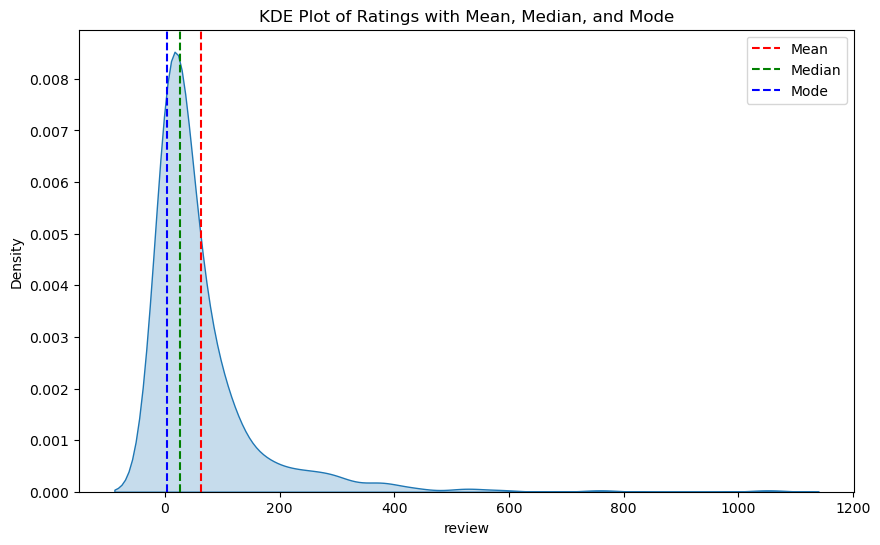

In [23]:
from scipy import stats

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['review'], shade=True)

# Calculate mean, median, and mode
mean_rating = df['review'].mean()
median_rating = df['review'].median()
mode_rating = stats.mode(df['review'])[0]  # No need for [0][0]

# Plot mean, median, and mode lines
plt.axvline(mean_rating, color='r', linestyle='--', label='Mean')
plt.axvline(median_rating, color='g', linestyle='--', label='Median')
plt.axvline(mode_rating, color='b', linestyle='--', label='Mode')

plt.legend()
plt.title('KDE Plot of Ratings with Mean, Median, and Mode')
plt.xlabel('review')
plt.ylabel('Density')
plt.show()
# Distribution: The blue shaded area on the plot shows the distribution of ratings. It indicates how frequently different review counts occur.
# Mean (Red): The average review count. It’s the point where the data balances.
# Median (Green): The middle value of the review counts. Half of the data falls below this point.
# Mode (Blue): The most common review count. It’s where the density peaks.
# all three lines are clustered around a review count below 200

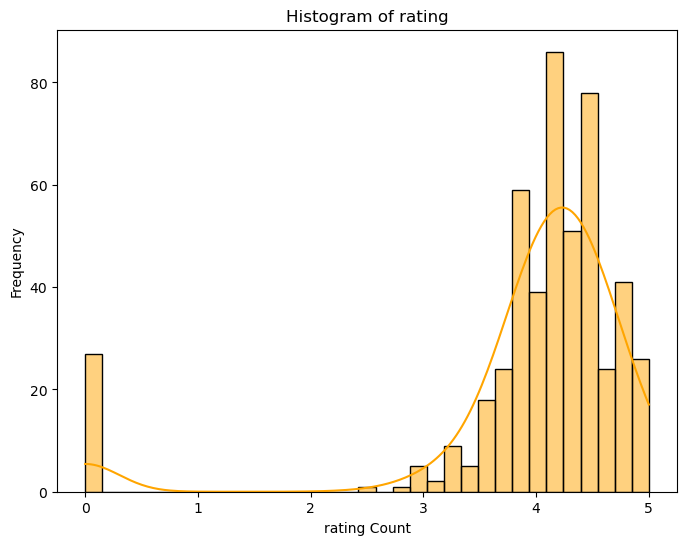

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df['rating'], color='orange', kde=True)
plt.title('Histogram of rating')
plt.xlabel('rating Count')
plt.ylabel('Frequency')
plt.show()

# Higher bars indicate that a particular rating was given more frequently.
# A curve line overlays the bars, indicating a trend or pattern in the distribution of ratings.
# Most ratings are concentrated around 4, as indicated by the tallest bar and the peak of the curve.





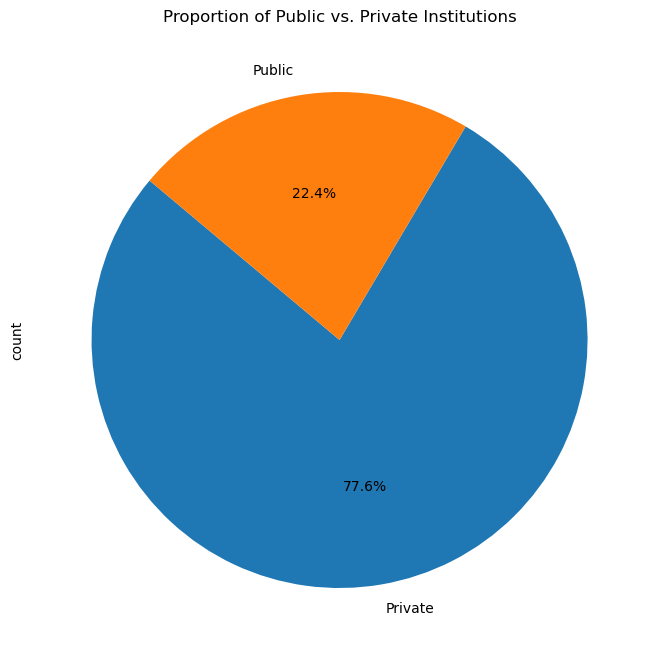

In [47]:
ownership_counts = df['ownership'].value_counts()
ownership_counts 

plt.figure(figsize=(8, 10))
ownership_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Public vs. Private Institutions')
plt.show()

# The smaller section of the pie, colored in orange, represents public institutions.
# The label within this orange section indicates that 22.4% of the institutions fall into the public category.
# The larger section of the pie, colored in blue, represents private institutions.
# The label within this blue section indicates that 77.6% of the institutions are private.
# The chart provides a visual comparison between the two types of institutions. It shows that a significant majority (77.6%) are private, while a smaller proportion (22.4%) are public.



# By-variante analysis 

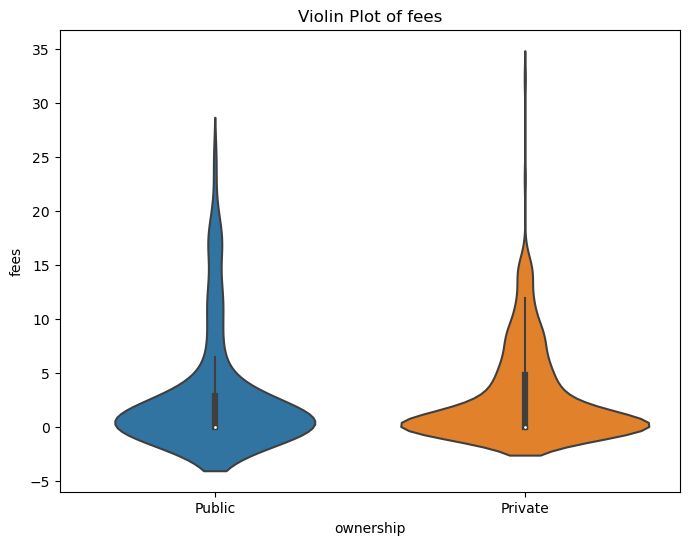

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x= df['ownership'],  y=df['fees'],  split=True)
plt.title('Violin Plot of fees')
plt.xlabel('ownership')
plt.show()

# The violin plot allows us to compare the distribution of fees between public and private colleges.
# Public Colleges:
# The blue violin is narrower, indicating less variability in fees.
# Most fees for public colleges are concentrated around the value of 10 (approximately).
# Private Colleges:
# The orange violin is wider and extends higher on the y-axis, showing greater variability.
# Most fees for private colleges are concentrated around the value of 15 (approximately), but they extend up to nearly 35.




C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.0% of the points

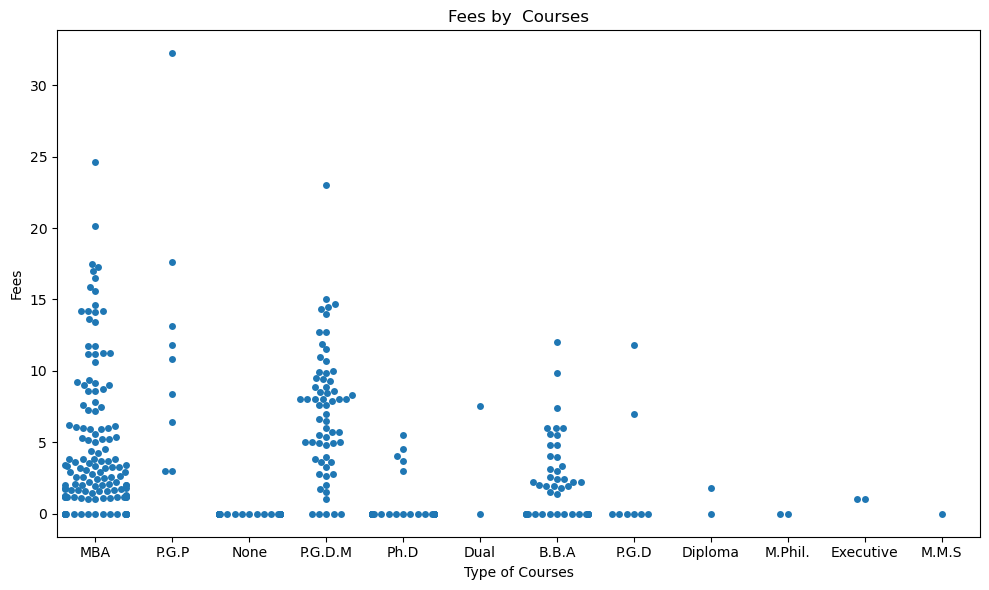

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Course', y='fees', data=df)
plt.title('Fees by  Courses')
plt.xlabel('Type of Courses')
plt.ylabel('Fees')
plt.tight_layout()
plt.show()

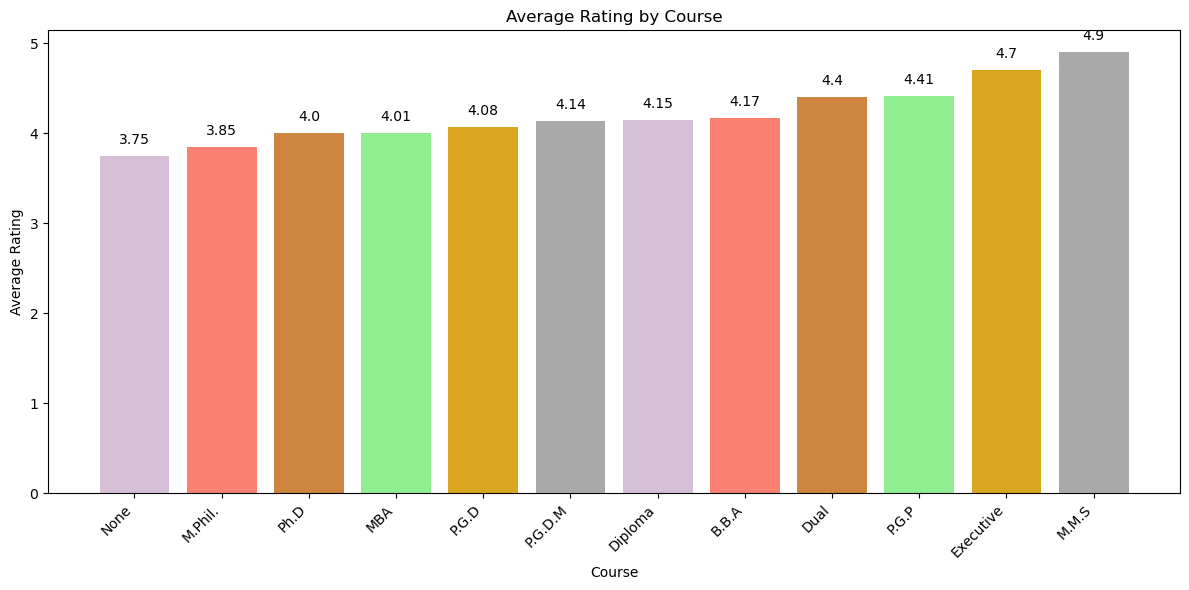

In [38]:
import matplotlib.pyplot as plt

# Calculate average rating based on the course
avg_rating_course = df.groupby('Course')['rating'].mean().sort_values()

# Plot the average rating based on the course
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_rating_course.index, avg_rating_course.values, color=['thistle', 'salmon', 'peru','lightgreen','goldenrod','darkgrey'])
plt.xlabel('Course')
plt.ylabel('Average Rating')
plt.title('Average Rating by Course')
plt.xticks(rotation=45, ha='right')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


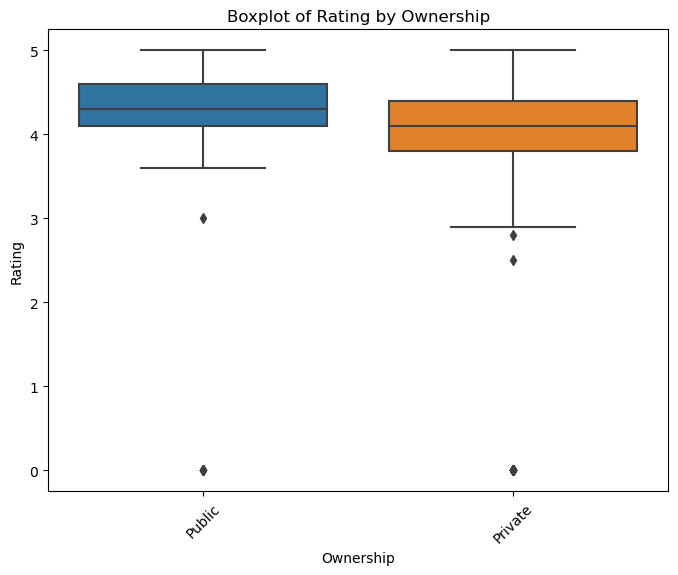

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ownership', y='rating', data=df)
plt.title('Boxplot of Rating by Ownership')
plt.xlabel('Ownership')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# The “Boxplot of Rating by Ownership.” It compares ratings based on ownership type (either public or private). 
# Public Ownership:
# Median Rating: Approximately 4
# Interquartile Range (IQR): From around 3.75 to 4.25
# Outliers: Two data points below the lower whisker (indicating significantly lower ratings)
# Private Ownership:
# Median Rating: Also around 4
# Narrower IQR: Approximately 3.9 to 4.1
# Outliers: Two data points below the lower whisker


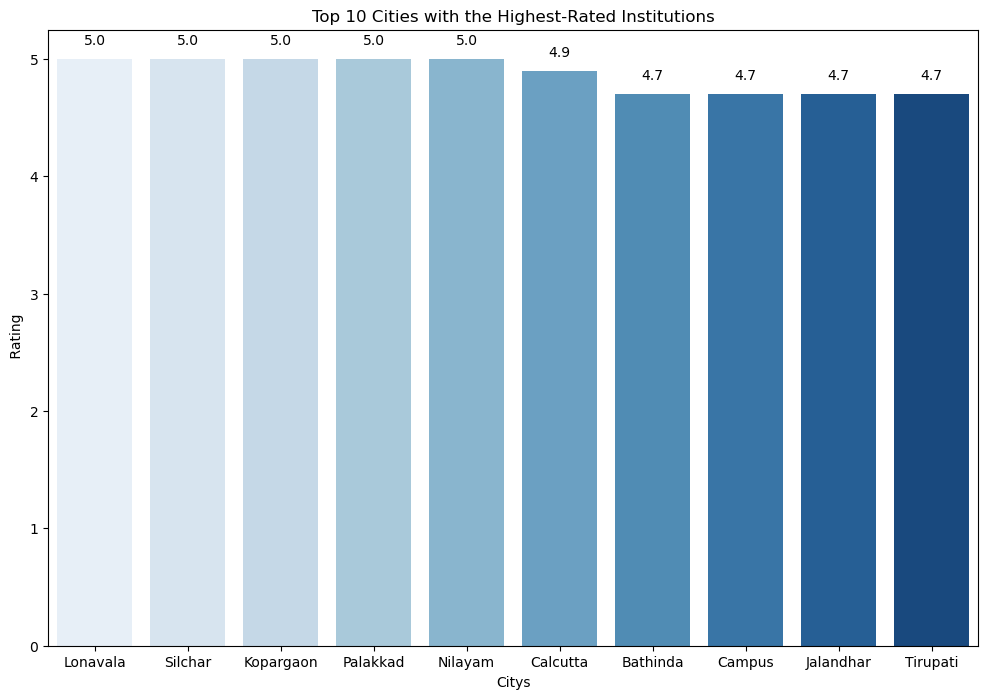

In [49]:
city_avg_rating = df.groupby('city')['rating'].mean().reset_index()
city_avg_rating_sorted = city_avg_rating.sort_values(by='rating', ascending=False)
top_rated_cities = city_avg_rating_sorted.head(10)
top_rated_cities

plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='rating', data=top_rated_cities, palette='Blues')

plt.title('Top 10 Cities with the Highest-Rated Institutions')
plt.xlabel('Citys')
plt.ylabel(' Rating')

# Add values on each bar
for i, rating in enumerate(top_rated_cities['rating']):
    plt.text(i, rating + 0.1, round(rating, 2), ha='center', va='bottom')
plt.show()

# The graph is a bar plot that represents the highest-rated institutions in different cities.
# The cities of Lonavala, Silchar, Kopargaon, Palakkad, and Nilayam all have a perfect rating of 5.0.
# 'Calcutta 'is close behind with an rating of 4.9.
#  Bathinda Campus, Jalandhar, and Tirupati each have an average rating of 4.7.
# This information can be useful for students or researchers looking for top-rated institutions in these cities. 

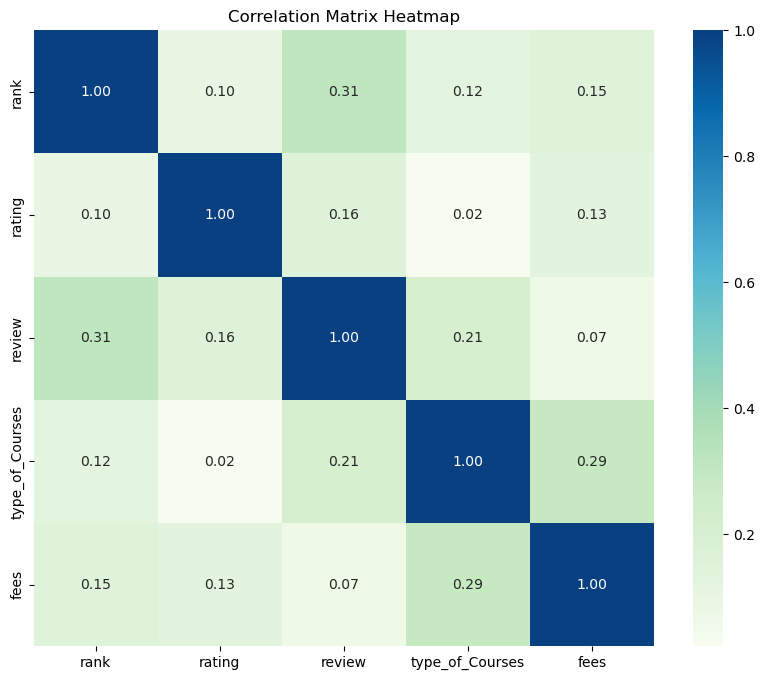

In [36]:
df_encoded = pd.get_dummies(df, columns=['ownership', 'city'])

# Exclude non-numeric columns
numeric_cols = df_encoded.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr = df_encoded[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='GnBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()




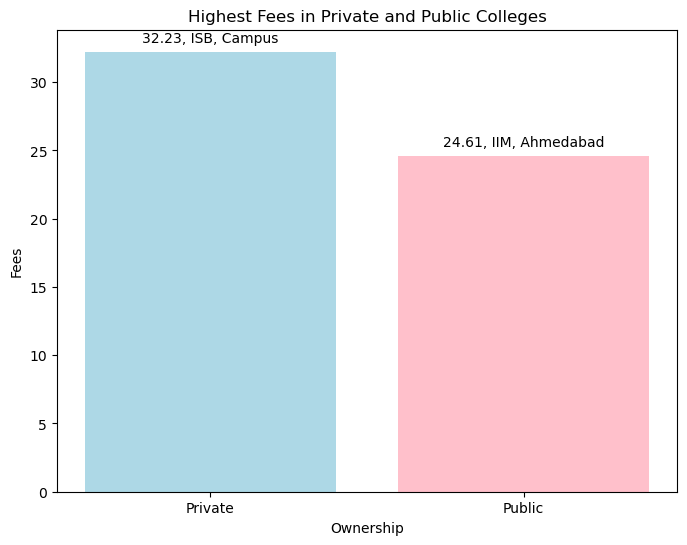

In [50]:
import matplotlib.pyplot as plt

# Data preparation
fees = [private_max_fee, public_max_fee]
ownership = ['Private', 'Public']
clgs = [private_clg, public_clg]
citys = [private_city, public_city]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(ownership, fees, color=['lightblue', 'pink'])
plt.xlabel('Ownership')
plt.ylabel('Fees')
plt.title('Highest Fees in Private and Public Colleges')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{fees[i]}, {clgs[i]}, {citys[i]}', ha='center', va='bottom')
plt.show()

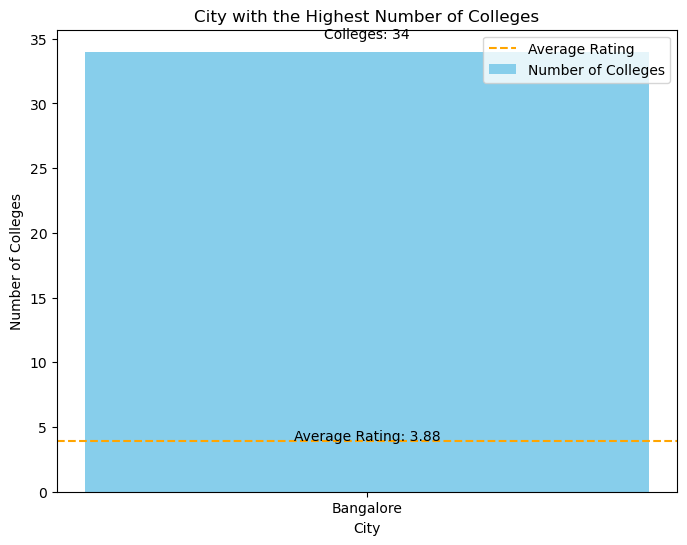

In [51]:
import matplotlib.pyplot as plt

# Grouping by city and counting the number of colleges
city_college_counts = df['city'].value_counts()

# Finding the city with the highest number of colleges
city_with_highest_colleges = city_college_counts.idxmax()

# Filtering the dataframe for the city with the highest number of colleges
city_df = df[df['city'] == city_with_highest_colleges]

# Calculating the average rating in that city
average_rating = city_df['rating'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(city_with_highest_colleges, city_college_counts.max(), color='skyblue', label='Number of Colleges')
plt.axhline(average_rating, color='orange', linestyle='--', label='Average Rating')
plt.text(city_with_highest_colleges, city_college_counts.max() + 1, f'Colleges: {city_college_counts.max()}', ha='center')
plt.text(city_with_highest_colleges, average_rating + 0.1, f'Average Rating: {average_rating:.2f}', ha='center')
plt.xlabel('City')
plt.ylabel('Number of Colleges')
plt.title('City with the Highest Number of Colleges')
plt.legend()
plt.show()


# By-variante analysis :

In [4]:
import plotly.express as px

fig = px.sunburst(df, path=['ownership', 'city', 'clgs'], values='fees')
fig.write_html('sunburst.html')
fig.show()


In [3]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.treemap(df, path=['ownership', 'clgs'], values='fees')
fig.write_html('treemap.html')
fig.show()

In [5]:

import plotly.graph_objects as go

# Define the data for the table
data = [
    go.Table(
        header=dict(values=["rank", "rating", "review", "ownership", "city", "clgs", "type_of_Courses", "Course", "fees"]),
        cells=dict(values=[df['rank'], df['rating'], df['review'], df['ownership'], df['city'], df['clgs'], df['type_of_Courses'], df['Course'], df['fees']])
    )
]

# Define the layout for the table plot
layout = go.Layout(title="Colleges Data Table")

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In Bangalore, the college with the highest rating is: International with a rating of 5.0
In Delhi, the college with the highest rating is: IIT with a rating of 4.7
In Pune, the college with the highest rating is: SBPIM with a rating of 5.0
In Mumbai, the college with the highest rating is: JBIMS with a rating of 4.9
In Noida, the college with the highest rating is: IBI with a rating of 5.0
In Jaipur, the college with the highest rating is: Poddar with a rating of 5.0
In Chennai, the college with the highest rating is: Great with a rating of 4.4
In Coimbatore, the college with the highest rating is: GRGSMS with a rating of 4.9
In Hyderabad, the college with the highest rating is: MANNU with a rating of 4.9
In Ahmedabad, the college with the highest rating is: IIM with a rating of 4.8


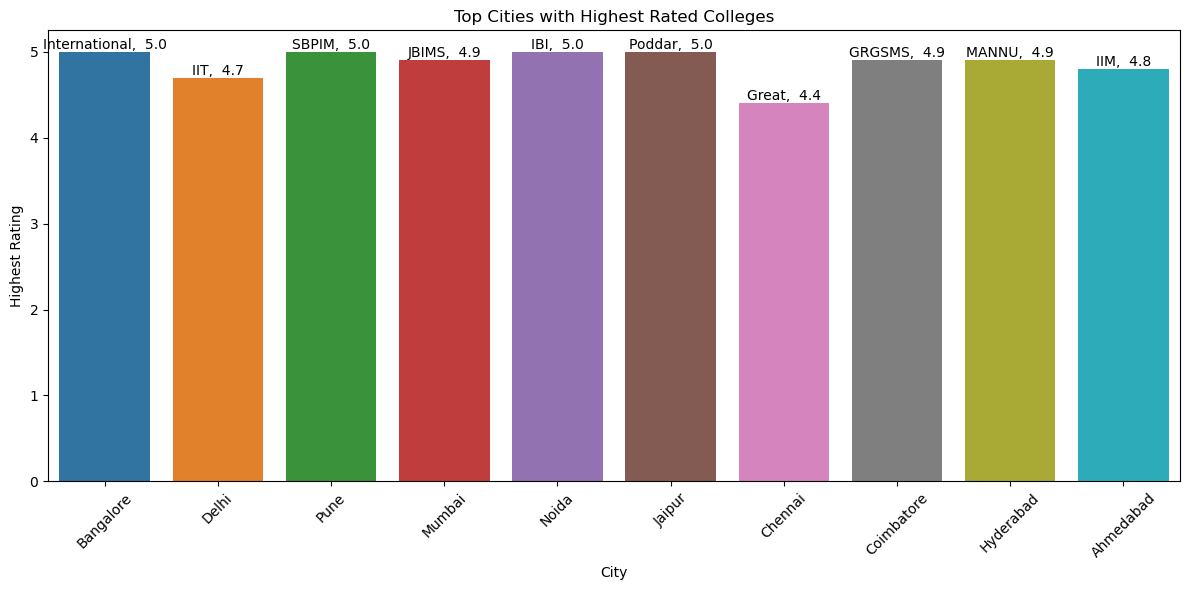

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 cities by college count
top_cities = df['city'].value_counts().nlargest(10).index

# Create lists to store the highest ratings and college names for each city
highest_ratings = []
college_names = []

# Iterate over each top city and find the college with the highest rating
for city in top_cities:
    highest_rating = df[df['city'] == city]['rating'].max()
    highest_ratings.append(highest_rating)
    college_name = df[(df['city'] == city) & (df['rating'] == highest_rating)]['clgs'].values[0]
    college_names.append(college_name)
    print(f"In {city}, the college with the highest rating is: {college_name} with a rating of {highest_rating}")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities, y=highest_ratings)
plt.title('Top Cities with Highest Rated Colleges')
plt.xlabel('City')
plt.ylabel('Highest Rating')

# Add college names and values to the bins
for i, (name, value) in enumerate(zip(college_names, highest_ratings)):
    plt.text(i, value, f"{name},  {value}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Lenova\AppData\Local\Temp\ipykernel_10740\1053288780.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(pivot_table.columns))
C:\Users\Lenova\AppData\Local\Temp\ipykernel_10740\1053288780.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(pivot_table.index))
C:\Users\Lenova\AppData\Local\Temp\ipykernel_10740\1053288780.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels([''] + list(pivot_table.values))
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


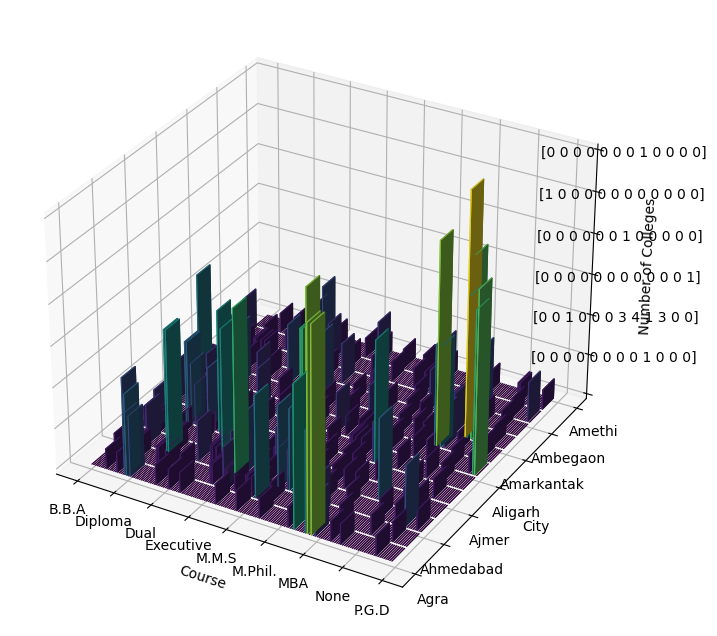

In [18]:
from mpl_toolkits.mplot3d import Axes3D
pivot_table=df.pivot_table(index='city', columns='Course', values='clgs', aggfunc='count', fill_value=0)
pivot_table

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid(np.arange(pivot_table.shape[0]), np.arange(pivot_table.shape[1]))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros_like(x_data)

colors = plt.cm.viridis((pivot_table.values.flatten() - pivot_table.values.min()) / (pivot_table.values.max() - pivot_table.values.min()))


ax.bar3d(x_data, y_data, z_data, dx=0.6, dy=0.9, dz=pivot_table.values.flatten(), color=colors)

ax.set_xlabel('Course')
ax.set_ylabel('City')
ax.set_zlabel('Number of Colleges')
ax.set_xticklabels([''] + list(pivot_table.columns))
ax.set_yticklabels([''] + list(pivot_table.index))
ax.set_zticklabels([''] + list(pivot_table.values))

plt.show()


# the  number of colleges for each type of course in each city, where the height of the bars represents the number of colleges.
# The graph visualizes the number of colleges offering various courses in different cities.
# The color of each bar corresponds to its height, with darker shades representing lower values and lighter shades representing higher values.

In [11]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Sample DataFrame
data = {
    'city': ['Bangalore', 'Delhi', 'Pune', 'Mumbai', 'Noida', 'Jaipur', 'Chennai', 'Coimbatore', 'Hyderabad', 'Ahmedabad'],
    'clgs': ['International', 'IIM', 'SBPIM', 'JBIMS', 'IBI', 'Poddar', 'Great', 'GRGSMS', 'MANNU', 'IIM'],
}
df1 = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent='my_geocoder')

# Create a base map
map_india = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for colleges
for index, row in df1.iterrows():
    try:
        location = geolocator.geocode(row['city'])
        folium.Marker([location.latitude, location.longitude], popup=row['clgs']).add_to(map_india)
    except Exception as e:
        print(f"Error geocoding {row['city']}: {e}")

# Display the map
map_india


In [9]:
map_india.save('map_india.html')

In [10]:
geolocator = Nominatim(user_agent='my_geocoder')

# Create a base map
map_india = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for colleges
for index, row in df.iterrows():
    try:
        location = geolocator.geocode(row['city'])
        folium.Marker([location.latitude, location.longitude], popup=row['clgs']).add_to(map_india)
    except Exception as e:
        print(f"Error geocoding {row['city']}: {e}")

# Display the map
map_india


Error geocoding Chandigarh: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Chandigarh&format=json&limit=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000226C8BA4950>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Error geocoding Phagwara: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Phagwara&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
